# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [9]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import  r2_score, classification_report, roc_curve


In [2]:
pip install palmerpenguins

In [3]:
from palmerpenguins import load_penguins
df = load_penguins()
good_cols = df.isna().sum() < 100
df = df.loc[:,good_cols]

# Drop other NAs
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [21]:
X = df.drop(["species"], axis = 1)
y = df["species"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 3)


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [17]:
knn3_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])
knn5_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

dt_pipeline1 = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(max_depth=5, min_impurity_decrease=.01))
])

dt_pipeline2 = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(max_depth=5, min_impurity_decrease=.02))
])

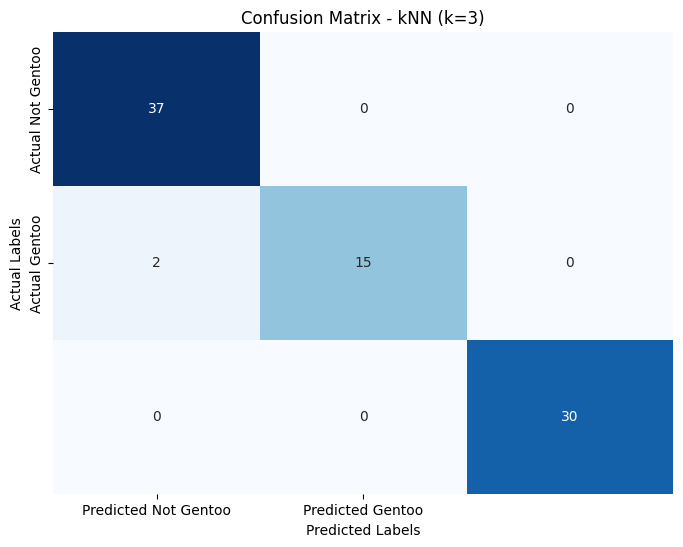

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
knn3= knn3_pipeline.fit(X_train, y_train)

y_pred3 = knn3.predict(X_test)

confusionmt3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmt3, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Gentoo', 'Predicted Gentoo'],
            yticklabels=['Actual Not Gentoo', 'Actual Gentoo'])

plt.title('Confusion Matrix - kNN (k=3)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [25]:
cross_val_score(knn3_pipeline, X, y, cv = 5, scoring = 'accuracy').mean()


0.9819990954319312

In [26]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.97        37
   Chinstrap       1.00      0.88      0.94        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.98        84
   macro avg       0.98      0.96      0.97        84
weighted avg       0.98      0.98      0.98        84



In [28]:
y_score = knn3.predict_proba(X_test)
auc_kn_3 = roc_auc_score(y_test, y_score, multi_class='ovr')
auc_kn_3

0.9866499791405925

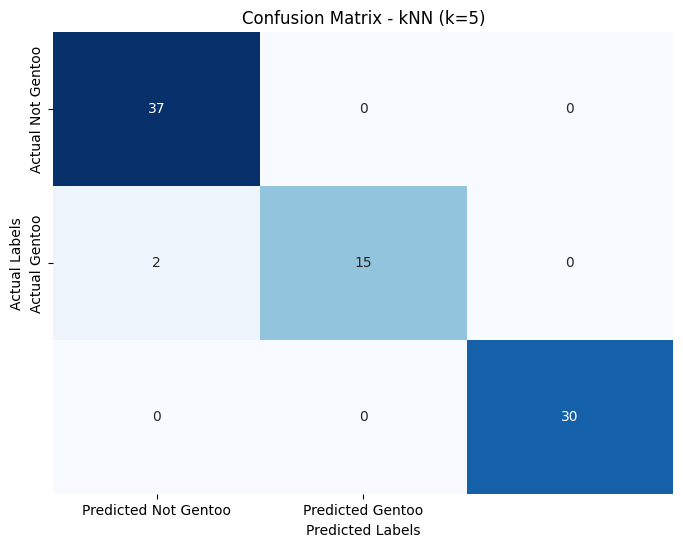

In [29]:
knn5= knn5_pipeline.fit(X_train, y_train)

y_pred5 = knn5.predict(X_test)

confusionmt5 = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmt5, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Gentoo', 'Predicted Gentoo'],
            yticklabels=['Actual Not Gentoo', 'Actual Gentoo'])

plt.title('Confusion Matrix - kNN (k=5)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [30]:
cross_val_score(knn5_pipeline, X, y, cv = 5, scoring = 'accuracy').mean()

0.9939846223428311

In [34]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.97        37
   Chinstrap       1.00      0.88      0.94        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.98        84
   macro avg       0.98      0.96      0.97        84
weighted avg       0.98      0.98      0.98        84



In [36]:
y_score = knn5.predict_proba(X_test)
auc_kn5 = roc_auc_score(y_test, y_score, multi_class='ovr')
auc_kn5

1.0

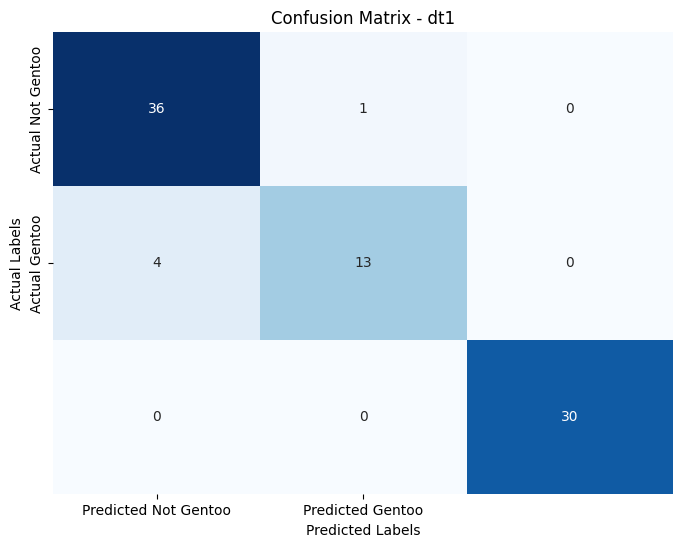

In [40]:
dt1= dt_pipeline1.fit(X_train, y_train)

y_preddt1 = dt1.predict(X_test)

confusionmtdt1 = confusion_matrix(y_test, y_preddt1)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmtdt1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Gentoo', 'Predicted Gentoo'],
            yticklabels=['Actual Not Gentoo', 'Actual Gentoo'])

plt.title('Confusion Matrix - dt1')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [33]:
cross_val_score(dt_pipeline1, X, y, cv = 5, scoring = 'accuracy').mean()

0.9639077340569878

In [38]:
print(classification_report(y_test, y_preddt1))

              precision    recall  f1-score   support

      Adelie       0.90      0.97      0.94        37
   Chinstrap       1.00      0.76      0.87        17
      Gentoo       0.97      1.00      0.98        30

    accuracy                           0.94        84
   macro avg       0.96      0.91      0.93        84
weighted avg       0.94      0.94      0.94        84



In [37]:
y_score = dt1.predict_proba(X_test)
auc_dt1 = roc_auc_score(y_test, y_score, multi_class='ovr')
auc_dt1

0.9559076367882775

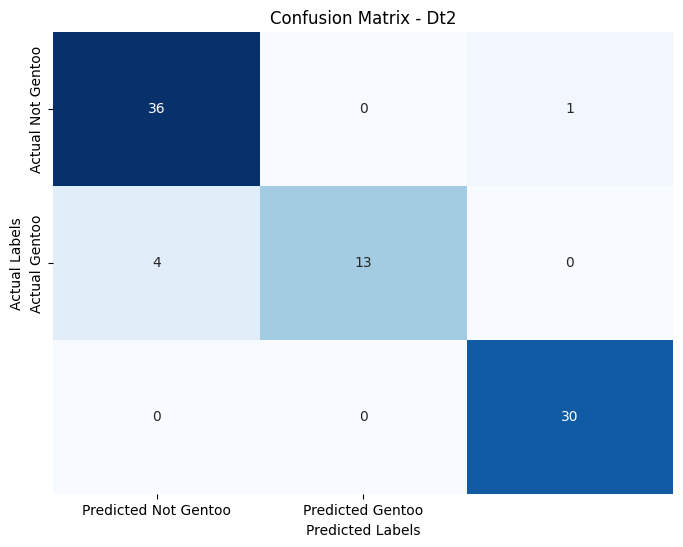

In [39]:
dt2= dt_pipeline2.fit(X_train, y_train)

y_preddt2 = dt2.predict(X_test)

confusionmtdt2 = confusion_matrix(y_test, y_preddt2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmtdt1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Gentoo', 'Predicted Gentoo'],
            yticklabels=['Actual Not Gentoo', 'Actual Gentoo'])

plt.title('Confusion Matrix - Dt2')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [41]:
cross_val_score(dt_pipeline2, X, y, cv = 5, scoring = 'accuracy').mean()

0.9518769787426503

In [42]:
print(classification_report(y_test, y_preddt2))

              precision    recall  f1-score   support

      Adelie       0.90      0.97      0.94        37
   Chinstrap       1.00      0.76      0.87        17
      Gentoo       0.97      1.00      0.98        30

    accuracy                           0.94        84
   macro avg       0.96      0.91      0.93        84
weighted avg       0.94      0.94      0.94        84



In [43]:
y_score = dt2.predict_proba(X_test)
auc_dt2 = roc_auc_score(y_test, y_score, multi_class='ovr')
auc_dt2

0.9559076367882775

In [44]:
from sklearn.preprocessing import label_binarize

#binarize
species_names = ['Adelie', 'Chinstrap', 'Gentoo']
y_bin = label_binarize(y, classes=species_names)
y_test_bin = label_binarize(y_test, classes=species_names)

#extract the column corresponding to 'Adelie'
idx_adelie = species_names.index('Adelie')
y_bin_adelie = y_bin[:, idx_adelie]
y_test_bin_adelie = y_test_bin[:, idx_adelie]

In [46]:

from sklearn.metrics import roc_curve, auc
#compute ROC metrics for kn_pipeline_1
y_score_adelie_kn3 = knn3.predict_proba(X_test)[:, idx_adelie]
fpr_adelie_kn3, tpr_adelie_kn3, _ = roc_curve(y_test_bin_adelie, y_score_adelie_kn3)
roc_auc_adelie_kn3 = auc(fpr_adelie_kn3, tpr_adelie_kn3)

#compute ROC metrics for kn_pipeline_2
y_score_adelie_kn10 = knn5.predict_proba(X_test)[:, idx_adelie]
fpr_adelie_kn10, tpr_adelie_kn10, _ = roc_curve(y_test_bin_adelie, y_score_adelie_kn10)
roc_auc_adelie_kn10 = auc(fpr_adelie_kn10, tpr_adelie_kn10)

#compute ROC metrics for dtree_pipeline_1
y_score_adelie_t1 = dt1.predict_proba(X_test)[:, idx_adelie]
fpr_adelie_t1, tpr_adelie_t1, _ = roc_curve(y_test_bin_adelie, y_score_adelie_t1)
roc_auc_adelie_t1 = auc(fpr_adelie_t1, tpr_adelie_t1)

#compute ROC metrics for dtree_pipeline_2
y_score_adelie_t2 = dt1.predict_proba(X_test)[:, idx_adelie]
fpr_adelie_t2, tpr_adelie_t2, _ = roc_curve(y_test_bin_adelie, y_score_adelie_t2)
roc_auc_adelie_t2 = auc(fpr_adelie_t2, tpr_adelie_t2)

In [47]:

data_roc = pd.DataFrame({
    'FPR': np.concatenate([fpr_adelie_kn3, fpr_adelie_kn10, fpr_adelie_t1, fpr_adelie_t2]),
    'TPR': np.concatenate([tpr_adelie_kn3, tpr_adelie_kn10, tpr_adelie_t1, tpr_adelie_t2]),
    'Model': ['KNN k=3'] * len(fpr_adelie_kn3) + ['KNN k=10'] * len(fpr_adelie_kn10) +
             ['Decision Tree Leaf=4'] * len(fpr_adelie_t1) + ['Decision Tree Leaf=20'] * len(fpr_adelie_t2)
})

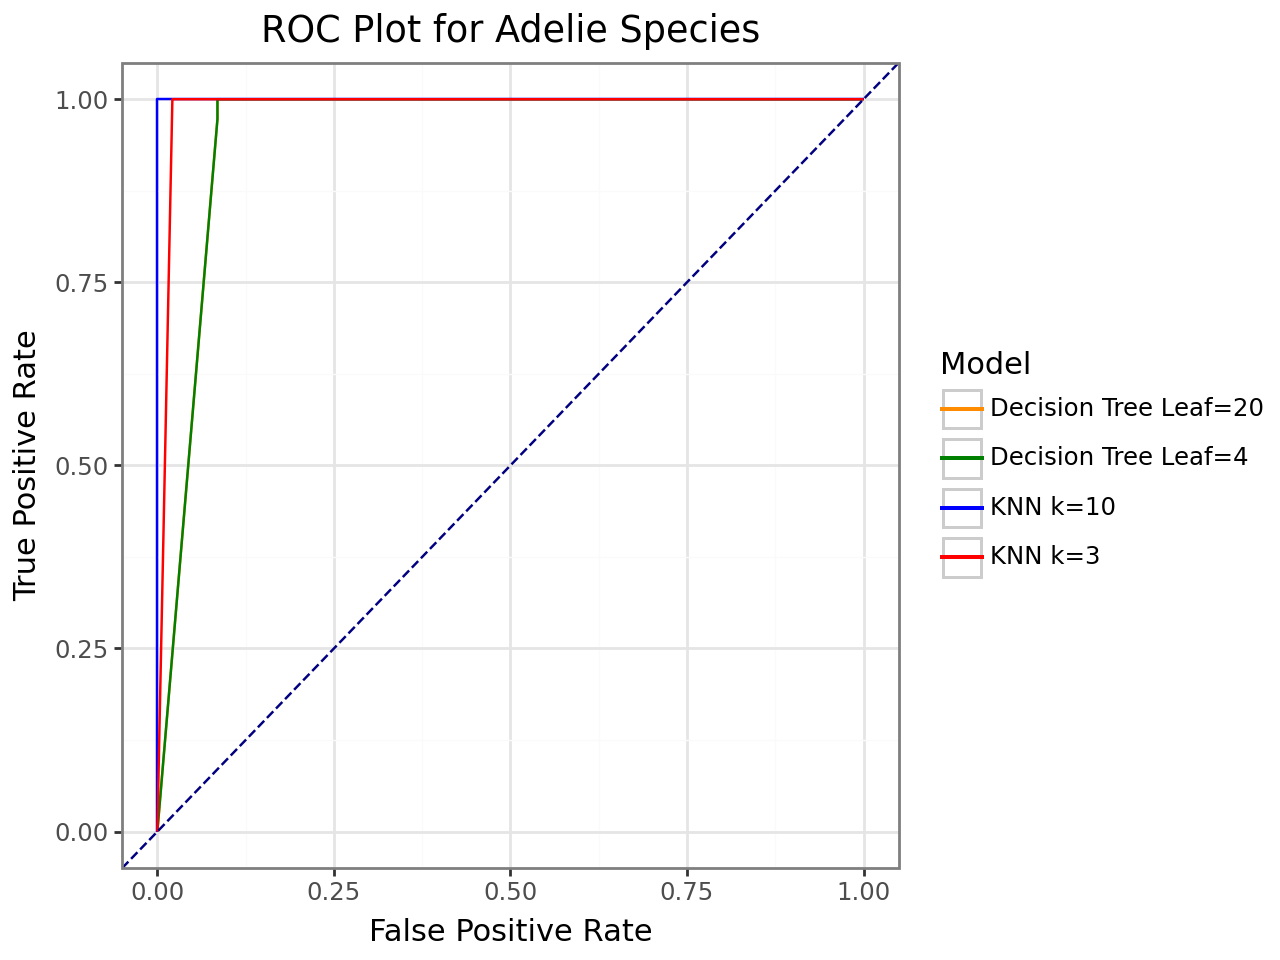

In [48]:

from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_bw, scale_color_manual

(ggplot(data_roc, aes(x='FPR', y='TPR', color='Model')) +
    geom_line() + geom_abline(linetype='dashed', color='navy') +
    labs(title='ROC Plot for Adelie Species',
         x='False Positive Rate',
         y='True Positive Rate') +
    theme_bw() +
    scale_color_manual(values=['darkorange', 'green', 'blue', 'red'])
)